In [61]:
import sys
sys.path.append('/home/tpopova/prj/PB_SCF/05_solvent_chi_flat/py_files')

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import matplotlib.cm as cm

from matplotlib.cm import get_cmap
from create_in import create_in
from out_reader import out_reader
from scipy.signal import find_peaks

In [62]:
N_range = [100, 200, 400, 500, 600, 700, 800, 900]

S_namics = 50

alpha = 0.4

Cs = pow(10, -2) * 1.66

chi_range = [1.8, 2.0, 2.4]

# [2.1, 2.2, 2.3, 2.4, 2.5, 2.6]

In [63]:
profiles = {}  # Общая структура для всех chi
for chi in chi_range:
    phi_brush_prof, psi_brush_prof, ends_brush_prof, Na_prof, Cl_prof = {}, {}, {}, {}, {}
    for n in N_range:
        new_file_path = create_in(
            range_param = 'chi',
            min_val = 0.1,
            max_val = 0.1,
            Cs = Cs,
            chi_first_try = 0.5,
            chi_ions_first_try = 0.5,
            chi_surf_first_try = 0.5,
            N_layers_first_try = 150,
            N_first_try = 150,

            S = S_namics,
            alpha = alpha,
            Kuhn = '1e-09',
            initial_cond = True,

            N_layers = int(n * 5 / 16),
            N = n,
            chi = chi,
            chi_ions = chi,
            chi_surf = chi,
        )

        # Парсим профили
        psi, phi_brush, phi_end_brush, phi_Na, phi_Cl = out_reader(alpha=alpha, file_names=new_file_path)
        phi_brush_prof[n] = phi_brush
        psi_brush_prof[n] = psi
        ends_brush_prof[n] = phi_end_brush
        Na_prof[n] = phi_Na
        Cl_prof[n] = phi_Cl
        
    profiles[chi] = {  # Сохраняем данные для каждого chi
        "phi_brush": phi_brush_prof,
        "psi_brush": psi_brush_prof,
        "ends_brush": ends_brush_prof,
        "Na": Na_prof,
        "Cl": Cl_prof,
    }

No output defined! 
No output defined! 
Problem nr 1 out of 2
The program is compiled for the use of 'long double' while 'overflow_protection' is not requested for;
1. Turn on 'overflow_protection'.
2. Compile progrem without the #define 'LongReal' in namics.h. 
NEWTON has been notified.
Your guess:it =  0  E = 1.341611e+00 |g| = 2.515462e+00 alpha = 1.000000e+00 
hessian scaling: 0.424146
it =  1  E = 1.246177e+00 |g| = 2.387354e+00 alpha = 1.397541e-01 
it =  2  E = 2.904409e+00 |g| = 2.518485e+00 alpha = 2.556826e-02 
it =  3  E = 4.175139e+00 |g| = 2.395869e+00 alpha = 1.094152e-02 
it =  4  E = 5.207724e+00 |g| = 2.433270e+00 alpha = 6.694390e-03 
it =  5  E = 3.233630e+00 |g| = 2.345683e+00 alpha = 1.575479e-02 
it =  6  E = 3.352800e+00 |g| = 2.327495e+00 alpha = 1.364351e-02 
it =  7  E = 3.864659e+00 |g| = 2.286585e+00 alpha = 9.480596e-03 
it =  8  E = 2.774195e+00 |g| = 2.259701e+00 alpha = 1.715671e-02 
it =  9  E = 3.177489e+00 |g| = 2.217878e+00 alpha = 1.213990e-02 
it =

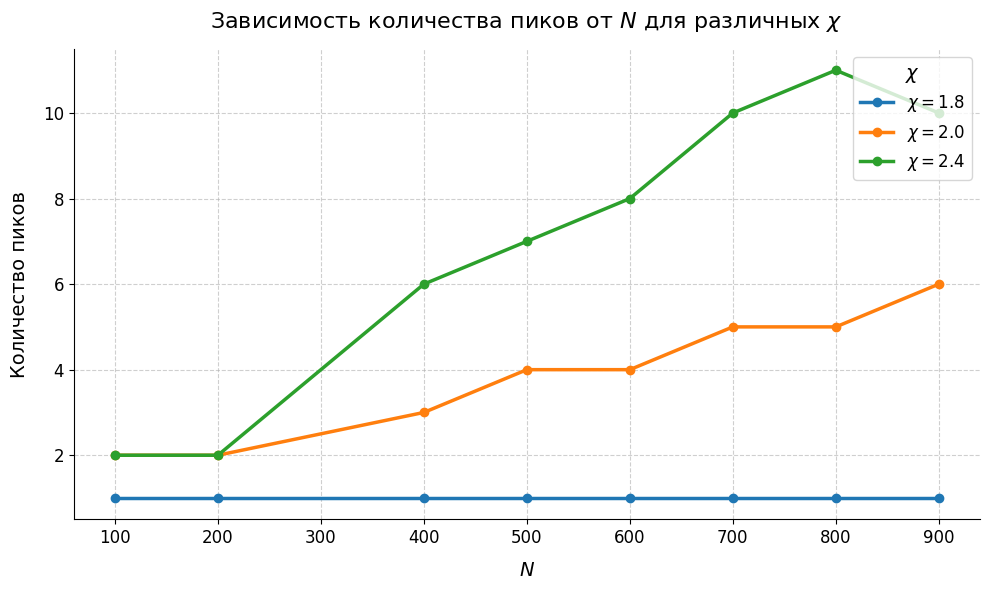

In [90]:
# Создаем график
fig, ax = plt.subplots(figsize=(10, 6))

# Перебираем значения chi
for chi, subprofiles in profiles.items():
    phi_brush_prof = subprofiles["phi_brush"]
    peaks_dict = {}  # Словарь для хранения количества пиков

    # Анализируем профили для каждого N
    for n, phi_brush in phi_brush_prof.items():
        # Поиск пиков
        peaks, _ = find_peaks(phi_brush, prominence = 0.01)
        peaks_dict[n] = len(peaks)  # Сохраняем количество пиков для каждого N

    # Построение линии для текущего chi
    ax.plot(
        list(peaks_dict.keys()),
        list(peaks_dict.values()),
        marker="o",
        linestyle="-",
        linewidth=2.5,
        label=f"$\\chi={chi}$"
    )

# Настройка графика
ax.set_title("Зависимость количества пиков от $N$ для различных $\\chi$", fontsize=16, pad=15)
ax.set_xlabel("$N$", fontsize=14, labelpad=10)
ax.set_ylabel("Количество пиков", fontsize=14, labelpad=10)
ax.grid(True, linestyle="--", alpha=0.6)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.tick_params(axis="both", which="major", labelsize=12)

# Добавляем легенду
ax.legend(title="$\\chi$", fontsize=12, title_fontsize=14, loc="upper right")

# Показываем график
plt.tight_layout()
plt.show()

# График для кол-ва пиков

/tmp/ipykernel_2811618/1600301153.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  color_map = get_cmap("plasma")


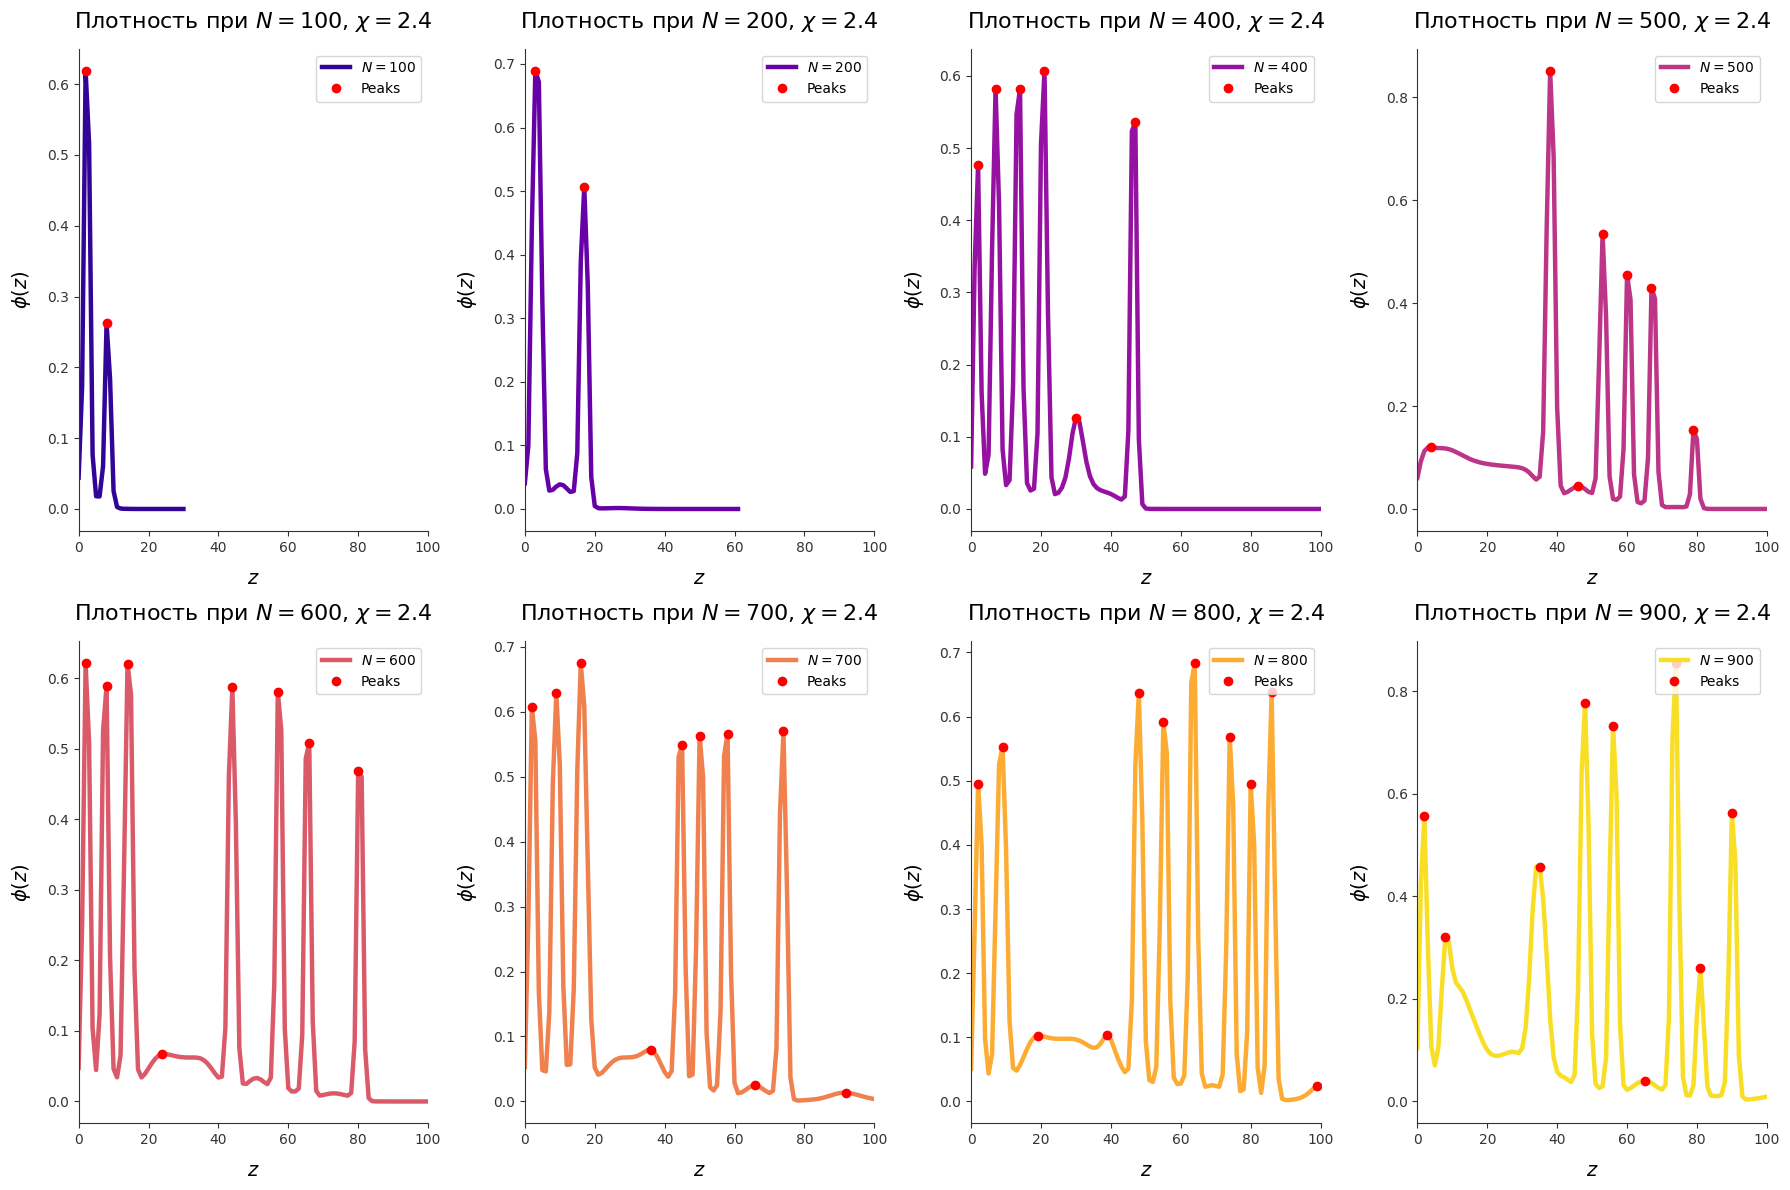

In [93]:
# Выбираем второй chi из chi_range (например, chi = chi_range[1])
second_chi = chi_range[2]  # Например, второй элемент из chi_range

# Получаем профили для этого chi из структуры profiles
phi_brush_prof = profiles[second_chi]["phi_brush"]

# Цветовая карта
color_map = get_cmap("plasma")

# Создаем сетку графиков 2x4
fig, axes = plt.subplots(2, 4, figsize=(18, 12))
axes = axes.flatten()  # Преобразуем массив осей в плоский список для удобного доступа

# Перебираем значения N и строим графики для выбранного chi
for i, (n, phi_brush) in enumerate(phi_brush_prof.items()):
    # Поиск пиков
    peaks, _ = find_peaks(phi_brush, prominence = 0.01)
    
    # Генерация цвета для графика
    base_color = color_map((i + 0.5) / len(phi_brush_prof))
    
    # Текущая ось для графика
    ax = axes[i]
    
    # Построение графика
    ax.plot(phi_brush, label=f'$N = {n}$', linewidth=3.2, color=base_color, linestyle="-")
    ax.plot(peaks, [phi_brush[p] for p in peaks], "ro", label="Peaks")  # Отображение пиков
    
    # Настройка текущего графика
    ax.set_title(f"Плотность при $N = {n}$, $\\chi = {second_chi}$", fontsize=16, pad=15)
    ax.set_xlabel("$z$", fontsize=14, labelpad=10)
    ax.set_ylabel("$\\phi(z)$", fontsize=14, labelpad=10)
    ax.legend(fontsize=10, loc="upper right")

    # Скрытие верхней и правой границ
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_color("#333333")
    ax.spines["bottom"].set_color("#333333")
    ax.tick_params(axis='both', which='major', labelsize=10, colors="#333333")
    ax.set_xlim(0, 100)

# Убираем лишние отступы и показываем график
plt.tight_layout()
plt.show()
